# Capstone Project - The Battle of Neighborhoods (Week 2)

Install BeautifulSoup 4 

In [ ]:
#!pip install beautifulsoup4
#!pip install geocoder

In [1]:
#import all required libs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from folium import plugins


* Step 1 : Get London Post Code data from csv file*

In [2]:
londonCodes=pd.read_csv('London_postcodes.csv')

In [ ]:
londonCodes.columns

* Step 2: Filter data and update column names/data types

In [3]:

#Drop non Greater London data rowsa
londonCodes = londonCodes[londonCodes['Built up area']== 'Greater London']
londonCodes = londonCodes[londonCodes['In Use?']=='Yes']
#Rename all required columns to simple names
londonCodes.rename(columns={'MSOA Code':'MSOA_Code'},inplace = True)
londonCodes.rename(columns={'Nearest station':'NearestStation'},inplace = True)
londonCodes.rename(columns={'Distance to station':'DistanceToStation'},inplace = True)
londonCodes.rename(columns={'Index of Multiple Deprivation':'DeprivationIndex'},inplace = True)


#Change datatype of required columns
londonCodes.MSOA_Code = londonCodes.MSOA_Code.astype(str)
londonCodes.Postcode = londonCodes.Postcode.astype(str)




* Step 3: Read earnings data available for each MSOA Codes 

# Read Earnings Data and combine that with londonCodes #

In [4]:
#Read CSV and reduce dataframe to required two columns
londonEarnings=pd.read_csv('MSOA_earningsdata.csv')
londonEarnings = londonEarnings[['MSOA code','Net annual income after housing costs (£)']]
#Rename all required columns to simple names
londonEarnings.rename(columns={'MSOA code':'MSOA_Code'},inplace = True)
londonEarnings.rename(columns={'Net annual income after housing costs (£)':'NetAnnualEarningGBP'},inplace = True)
#Change datatype of required columns
#remove , from amount so that it can be converted to float
londonEarnings['NetAnnualEarningGBP'] = londonEarnings['NetAnnualEarningGBP'].str.replace(',', '')

londonEarnings.NetAnnualEarningGBP = londonEarnings.NetAnnualEarningGBP.astype(float)
londonEarnings.MSOA_Code = londonEarnings.MSOA_Code.astype(str)


londonEarnings.head()

,MSOA_Code,NetAnnualEarningGBP
0,E02004297,25600.0
1,E02004290,27500.0
2,E02004298,26700.0
3,E02004299,22400.0
4,E02004291,20900.0


* Step 4: Merge Earnings data with London Post code data

In [5]:
#Join/merge two dataframes
londonCodes = pd.merge(londonCodes,londonEarnings,on='MSOA_Code', how='inner')
londonCodes.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,DeprivationIndex,Quality,User Type,Last updated,NearestStation,DistanceToStation,Postcode area,Postcode district,Police force,NetAnnualEarningGBP
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,NaN,Bromley,Bromley Town,...,20532,1,0,2019-03-28,Bromley South,0.218257,BR,BR1,Metropolitan Police,39100.0
1,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,NaN,Bromley,Bromley Town,...,19350,1,0,2019-03-28,Bromley North,0.462939,BR,BR1,Metropolitan Police,39100.0
2,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,NaN,Bromley,Bromley Town,...,20532,1,0,2019-03-28,Bromley South,0.227664,BR,BR1,Metropolitan Police,39100.0
3,BR1 1AG,Yes,51.401392,0.014948,540259,168855,TQ402688,NaN,Bromley,Bromley Town,...,20532,1,0,2019-03-28,Bromley South,0.227664,BR,BR1,Metropolitan Police,39100.0
4,BR1 1AH,Yes,51.400441,0.017390,540432,168754,TQ404687,NaN,Bromley,Bromley Town,...,20532,1,0,2019-03-28,Bromley South,0.048906,BR,BR1,Metropolitan Police,39100.0


In [6]:
londonCodes.describe()

,Latitude,Longitude,Easting,Northing,County,National Park,Population,Households,Altitude,London zone,Local authority,DeprivationIndex,Quality,User Type,DistanceToStation,NetAnnualEarningGBP
count,178666.000000,178666.000000,178666.000000,178666.000000,0.0,0.0,138960.000000,138960.000000,178666.000000,178666.000000,0.0,178666.000000,178666.000000,178666.000000,178666.000000,178666.000000
mean,51.507392,-0.128246,529997.692549,180388.505972,NaN,NaN,58.265285,23.291667,34.790240,3.256098,NaN,14196.171264,1.008418,0.100573,0.651779,31125.834238
std,0.071398,0.145407,10091.326742,7944.121012,NaN,NaN,44.691185,17.161442,25.460552,1.565260,NaN,7927.501416,0.183520,0.300764,0.489945,7983.806683
min,51.298319,-0.496469,504168.000000,157136.000000,NaN,NaN,1.000000,0.000000,-1.000000,1.000000,NaN,586.000000,1.000000,0.000000,0.000000,16600.000000
25%,51.462462,-0.212506,524214.000000,175379.000000,NaN,NaN,24.000000,10.000000,16.000000,2.000000,NaN,7604.000000,1.000000,0.000000,0.320858,24700.000000
50%,51.513674,-0.130479,529863.000000,181043.500000,NaN,NaN,49.000000,20.000000,30.000000,3.000000,NaN,12875.000000,1.000000,0.000000,0.533854,30000.000000
75%,51.555632,-0.046679,535667.750000,185810.000000,NaN,NaN,83.000000,33.000000,46.000000,4.000000,NaN,20099.000000,1.000000,0.000000,0.853476,36200.000000
max,51.682211,0.279457,558084.000000,199975.000000,NaN,NaN,2110.000000,402.000000,213.000000,7.000000,NaN,32700.000000,6.000000,1.000000,6.126430,55300.000000


* Step 5: Clean data by replacing 0's with NaN

In [7]:
#replace 0's with NaN so that average, will work correctly

londonCodes['Population'] = londonCodes['Population'].replace(0.0,np.nan)
londonCodes['NetAnnualEarningGBP'] = londonCodes['NetAnnualEarningGBP'].replace(0.0,np.nan)



* Step 6: Reduce dataframe columns by removing unwanted data required for current analysis

In [9]:
#Reduce dataframe columns to minimum required data set

londonCodes = londonCodes[['Postcode', 'Latitude', 'Longitude', 'District','MSOA_Code','Population', 'DeprivationIndex','NetAnnualEarningGBP','Ward','NearestStation','DistanceToStation','London zone','Postcode district']]

londonCodes.head()

,Postcode,Latitude,Longitude,District,MSOA_Code,Population,DeprivationIndex,NetAnnualEarningGBP,Ward,NearestStation,DistanceToStation,London zone,Postcode district
0,BR1 1AA,51.401546,0.015415,Bromley,E02000144,NaN,20532,39100.0,Bromley Town,Bromley South,0.218257,5,BR1
1,BR1 1AE,51.404543,0.014195,Bromley,E02000144,34.0,19350,39100.0,Bromley Town,Bromley North,0.462939,4,BR1
2,BR1 1AF,51.401392,0.014948,Bromley,E02000144,NaN,20532,39100.0,Bromley Town,Bromley South,0.227664,5,BR1
3,BR1 1AG,51.401392,0.014948,Bromley,E02000144,NaN,20532,39100.0,Bromley Town,Bromley South,0.227664,5,BR1
4,BR1 1AH,51.400441,0.017390,Bromley,E02000144,NaN,20532,39100.0,Bromley Town,Bromley South,0.048906,5,BR1


In [10]:
londonCodes.describe()

,Latitude,Longitude,Population,DeprivationIndex,NetAnnualEarningGBP,DistanceToStation,London zone
count,178666.000000,178666.000000,138960.000000,178666.000000,178666.000000,178666.000000,178666.000000
mean,51.507392,-0.128246,58.265285,14196.171264,31125.834238,0.651779,3.256098
std,0.071398,0.145407,44.691185,7927.501416,7983.806683,0.489945,1.565260
min,51.298319,-0.496469,1.000000,586.000000,16600.000000,0.000000,1.000000
25%,51.462462,-0.212506,24.000000,7604.000000,24700.000000,0.320858,2.000000
50%,51.513674,-0.130479,49.000000,12875.000000,30000.000000,0.533854,3.000000
75%,51.555632,-0.046679,83.000000,20099.000000,36200.000000,0.853476,4.000000
max,51.682211,0.279457,2110.000000,32700.000000,55300.000000,6.126430,7.000000


# As next step: Visualise data using seaborn,matplotlib to see how data in related and what intution we can gain

In [11]:
import seaborn as sns
from folium import plugins
#sns.boxplot(x="DistanceToStation", y="NetAnnualEarningGBP", data=londonCodes)



How does earnings relates to distance from nearest station within given zone?

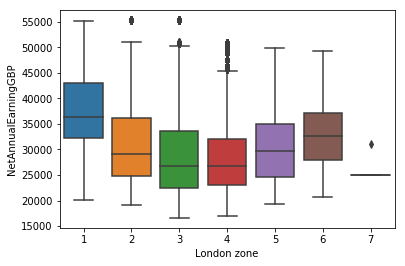

In [12]:
#With huge data both boxplot and warmplot becomes very slow
#sns.swarmplot(x="DistanceToStation",y="NetAnnualEarningGBP",hue='London zone',data=londonCodes,palette="Set1", split=True)
sns.boxplot(x="London zone", y="NetAnnualEarningGBP", data=londonCodes)

*** Let's reduce the data set based on Net Annual Earnings being above the average earnings **

In [13]:
londonCodes = londonCodes[londonCodes['NetAnnualEarningGBP']>= londonCodes['NetAnnualEarningGBP'].mean()]
londonCodes.shape

(81577, 13)

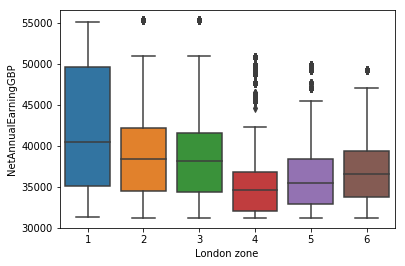

In [14]:
#Let's visualise how box plot changes after reducing the data set
sns.boxplot(x="London zone", y="NetAnnualEarningGBP", data=londonCodes)

*** Try DeprivationIndex vs net earnings on reduced Data Set ***

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


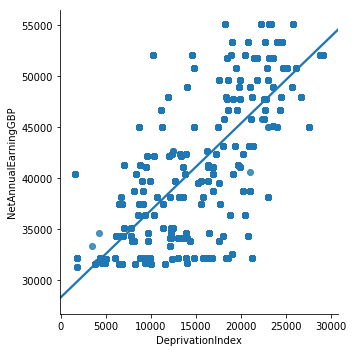

In [15]:
zone = londonCodes[londonCodes['London zone']== 1 ]
zone.set_index('DeprivationIndex')
sns.lmplot(x="DeprivationIndex",y="NetAnnualEarningGBP",data=zone,palette="Set1",fit_reg=True)
#lmplot / swarmplot
#sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, # No regression linehue='Stage')

This clearly proves the deprivation index is good indicator of net earnings index and can be used to further reduce the dataset for selection of the location. Lets use mean of deprivation index to reduce dataset further. 

In [16]:
londonCodes = londonCodes[londonCodes['DeprivationIndex']>= londonCodes['DeprivationIndex'].mean()]
londonCodes.shape

(42874, 13)

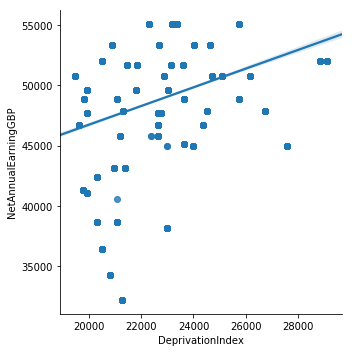

In [17]:
zone = londonCodes[londonCodes['London zone']== 1 ]
zone.set_index('DeprivationIndex')
sns.lmplot(x="DeprivationIndex",y="NetAnnualEarningGBP",data=zone,palette="Set1",fit_reg=True)



In [18]:

londonPopulation = londonCodes.groupby(['NearestStation'])['Population'].sum()
londonPopulation.head()

NearestStation
Abbey Wood           2373.0
Acton Central         539.0
Acton Town           1131.0
Addington Village    1003.0
Addiscombe           4978.0
Name: Population, dtype: float64

In [19]:
Earnings = londonCodes.groupby(['NearestStation'])['NetAnnualEarningGBP'].mean()
Earnings.head()

NearestStation
Abbey Wood           32854.285714
Acton Central        42600.000000
Acton Town           37100.000000
Addington Village    37100.000000
Addiscombe           33628.431373
Name: NetAnnualEarningGBP, dtype: float64

In [20]:
# Drop population and Earning from LondonCodes dataframe before reducing 
londonCodes = londonCodes[['Postcode', 'Latitude', 'Longitude', 'District','Ward','NearestStation','DistanceToStation','London zone','Postcode district']]


londonCodes.sort_values(['NearestStation', 'DistanceToStation'], ascending=[True, True], inplace=True)

londonStations = londonCodes.drop_duplicates('NearestStation', keep='first')
londonStations.shape

(355, 9)

# Merge the populationl and earnings with reduced station level data #

In [21]:
londonStationAll = londonStations
#Add/merge population 
londonStations =  pd.merge(londonStations,londonPopulation,on='NearestStation', how='inner')


In [22]:
#Add/merge mean earnings
londonStations =  pd.merge(londonStations,Earnings,on='NearestStation', how='inner')

londonStations.head()

,Postcode,Latitude,Longitude,District,Ward,NearestStation,DistanceToStation,London zone,Postcode district,Population,NetAnnualEarningGBP
0,SE2 0DN,51.484200,0.135724,Bexley,Belvedere,Abbey Wood,1.250720,4,SE2,2373.0,32854.285714
1,W4 1AF,51.503718,-0.258334,Ealing,Southfield,Acton Central,0.641223,2,W4,539.0,42600.000000
2,W3 8LH,51.502637,-0.280737,Hounslow,Turnham Green,Acton Town,0.056859,3,W3,1131.0,37100.000000
3,BR4 9RB,51.365781,-0.023105,Bromley,West Wickham,Addington Village,1.250740,3,BR4,1003.0,37100.000000
4,CR0 7AD,51.379899,-0.072203,Croydon,Addiscombe East,Addiscombe,0.070790,3,CR0,4978.0,33628.431373


In [23]:
londonStations.describe()

,Latitude,Longitude,DistanceToStation,London zone,Population,NetAnnualEarningGBP
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,51.485710,-0.142512,0.280279,3.563380,5047.411268,38523.514152
std,0.083670,0.143808,0.462659,1.593883,5030.544470,5359.015078
min,51.301562,-0.478850,0.000000,1.000000,0.000000,31200.000000
25%,51.417008,-0.228866,0.027352,2.000000,1196.000000,34603.921569
50%,51.494116,-0.153571,0.085524,3.000000,3172.000000,37303.333333
75%,51.549342,-0.053117,0.379275,5.000000,7809.000000,41166.063652
max,51.668575,0.251035,5.028770,6.000000,27004.000000,52000.000000


In [24]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


*** Visualise Population and Net Earnings across the stations in London area ***

In [25]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(londonStations['Population'],bins=20)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[99 59 39 30 20 24 13 20 19 10  8  3  2  2  1  2  1  0  1  2]
[    0.   1350.2  2700.4  4050.6  5400.8  6751.   8101.2  9451.4 10801.6
 12151.8 13502.  14852.2 16202.4 17552.6 18902.8 20253.  21603.2 22953.4
 24303.6 25653.8 27004. ]


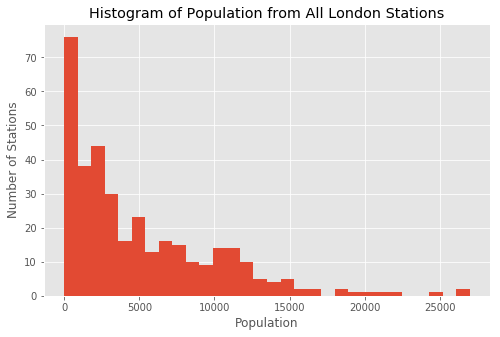

In [26]:
londonStations['Population'].plot(kind='hist', figsize=(8, 5),bins=30)

plt.title('Histogram of Population from All London Stations') # add a title to the histogram
plt.ylabel('Number of Stations') # add y-label
plt.xlabel('Population') # add x-label

plt.show()

In [27]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(londonStations['NetAnnualEarningGBP'],bins=30)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[21 18 14 18 18 16 36 19 22 18 15 20 12 15  7  7 12 11  2  8  6  2  4  6
  0  2  6  4  3 13]
[31200.         31893.33333333 32586.66666667 33280.
 33973.33333333 34666.66666667 35360.         36053.33333333
 36746.66666667 37440.         38133.33333333 38826.66666667
 39520.         40213.33333333 40906.66666667 41600.
 42293.33333333 42986.66666667 43680.         44373.33333333
 45066.66666667 45760.         46453.33333333 47146.66666667
 47840.         48533.33333333 49226.66666667 49920.
 50613.33333333 51306.66666667 52000.        ]


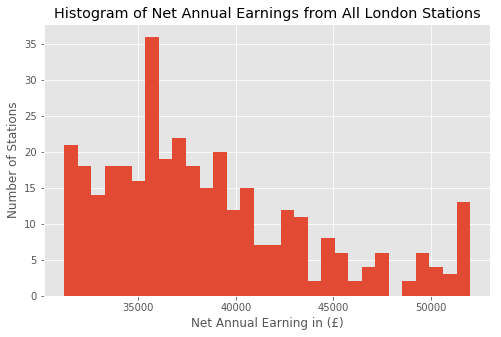

In [28]:
londonStations['NetAnnualEarningGBP'].plot(kind='hist', figsize=(8, 5),bins=30)

plt.title('Histogram of Net Annual Earnings from All London Stations') # add a title to the histogram
plt.ylabel('Number of Stations') # add y-label
plt.xlabel('Net Annual Earning in (£)') # add x-label

plt.show()

*** Import required libraries ***

In [29]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



Now get the coordinates of London UK required for map

In [30]:
address = 'London, UK'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

london_lat = latitude
london_long = longitude

The geograpical coordinate of London are 51.5073219, -0.1276474.


Add circle marks for all Boroughs to explore the area 

In [31]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(londonStations['Latitude'], londonStations['Longitude'], londonStations['NearestStation']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [32]:
greaterlondon_geo = r'combinedstations630.json' # geojson file

# create map and display it
london_map = folium.Map(location=[london_lat, london_long], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(londonStations.Latitude, londonStations.Longitude, londonStations.NearestStation):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(london_map)

# show map
london_map

In [33]:
CLIENT_ID = 'M11SXDXQUL5A5JBJIYK0RXV3IYY1I1ZKFAP43DHNDROFZQMO'#'540243976' # your Foursquare ID
CLIENT_SECRET = 'RICYXPGIS32EPXBDIK0WO2BHRPDSQBOHPPBRY55GVBEGCL3A' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
london_venues = getNearbyVenues(names=londonStations['Postcode'],
                                   latitudes=londonStations['Latitude'],
                                   longitudes=londonStations['Longitude']
                                  )

In [ ]:
#london_venues['Venue Category'].unique()

In [37]:
london_venues.head()

NameError: name 'london_venues' is not defined

In [ ]:
#london_venues.groupby(['Postcode','Venue Category']).agg({ 'Venue': ['count']})

In [ ]:
#This filter list is to ignore the venues which are not important for the given problem. Modify this list as per the problem at hand
filterList = ['Light Rail Station', 'Train Station','Platform','Tram Station','Pub', 'Bus Station','Discount Store','Metro Station','Bus Stop','Windmill','Convenience Store']

london_venues = london_venues[~london_venues['Venue Category'].isin(filterList)]


In [ ]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Postcode'] = london_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

In [ ]:
london_grouped = london_onehot.groupby('Postcode').mean().reset_index()

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postcode'] = london_grouped['Postcode']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [ ]:
cols_to_norm = ['Population','NetAnnualEarningGBP']
londonStations_norm = londonStations
londonStations_norm[cols_to_norm] = londonStations_norm[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
londonStations_norm.head()

In [ ]:
london_grouped = pd.merge(london_grouped,londonStations[['Population','NetAnnualEarningGBP','Postcode']], on='Postcode', how='inner')
london_grouped.head()

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 9

london_grouped_clustering = london_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9]

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = londonStations

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Postcode'), on='Postcode')

london_merged.head() # check the last columns!

In [ ]:
london_merged['Cluster Labels'].unique()

In [ ]:
london_merged['Cluster Labels'] = london_merged['Cluster Labels'].fillna(0.0).astype(int)
london_merged.head()

In [ ]:
london_merged.groupby(['Cluster Labels'])
london_merged.head()

In [ ]:
# create map
latitude = london_lat
longitude = london_long
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['NearestStation'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
cluster0 = london_merged[london_merged['Cluster Labels'] == 0]
cluster1 = london_merged[london_merged['Cluster Labels'] == 1]
cluster2 = london_merged[london_merged['Cluster Labels'] == 2]
cluster3 = london_merged[london_merged['Cluster Labels'] == 3]
cluster4 = london_merged[london_merged['Cluster Labels'] == 4]
cluster5 = london_merged[london_merged['Cluster Labels'] == 5]
cluster6 = london_merged[london_merged['Cluster Labels'] == 6]
cluster7 = london_merged[london_merged['Cluster Labels'] == 7]
cluster8 = london_merged[london_merged['Cluster Labels'] == 8]

In [ ]:
london_merged.columns



In [ ]:
london_merged.groupby(['Cluster Labels'])['NearestStation'].count()



In [ ]:
 
cluster0 = cluster0.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster0.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster1 = cluster1.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster1.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster2 = cluster2.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster2.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster3 = cluster3.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster3.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster4 = cluster4.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster4.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster5 = cluster5.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster5.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster6 = cluster6.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster6.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster7 = cluster7.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster7.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

In [ ]:
cluster8 = cluster8.drop(['Latitude', 'Longitude', 'District', 'Ward','Postcode district'], axis=1)
cluster8.sort_values(['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','NetAnnualEarningGBP'], ascending=[True, True,True,True])

# Cluster 0 seems to most suitable for the client to open new center #

In [ ]:
cluster0.shape

In [ ]:
cluster0Venues = london_venues[london_venues['Postcode'].isin(cluster0['Postcode'])]
cluster0Venues.head()

In [ ]:

temp = cluster0Venues.groupby(['Postcode','Venue Category'])['Venue'].count().reset_index()
temp.sort_values('Venue', ascending=False)
#temp['Venue Category'].unique()

In [ ]:
filterList = ['']
filterList = ['Art Gallery', 'Bike Shop','Concert Hall','Dance Studio','Gym / Fitness Center', 'Hotel','Performing Arts Venue','Theater']
filterList.extend(['Boxing Gym','Gym','Mini Golf','Yoga Studio',  'Shopping Mall', 'Social Club','Bookstore','Cycle Studio', 'Hostel', 'Boutique'])
filterList.extend(['Art Museum',  'Sports Bar', 'Health & Beauty Service','Sporting Goods Shop', 'Tennis Court','Athletics & Sports','Playground'])
filterList.extend(['Pool','Stadium','Jewelry Store','Spa', "Men's Store", 'Perfume Shop',"Women's Store", 'College Residence Hall', 'Nail Salon'])     
filterList.extend(['Radio Station', 'Science Museum', 'Club House'])

final_venues = temp[temp['Venue Category'].isin(filterList)]



In [ ]:
londonStations.columns

In [ ]:
Top_Locations = final_venues.groupby(['Postcode'])['Venue'].sum().reset_index()
Top_Locations = pd.merge(Top_Locations,londonStations[['Population','NetAnnualEarningGBP','London zone','Postcode']],on='Postcode', how='inner')

Top_Locations.sort_values('Venue', ascending=False)

In [54]:
Top_Locations.to_excel("TopLocations_for_LondonCryoNormalised.xlsx")

In [57]:
Top_Locations = pd.merge(Top_Locations,londonStations[['Latitude','Longitude','Postcode']], on='Postcode', how='inner')


In [58]:
Top_Locations.head()

,Unnamed: 0,Postcode,Venue,Population,NetAnnualEarningGBP,NearestStation,London zone,Latitude,Longitude
0,18,SW1X 7TA,26,0.045475,0.779084,Hyde Park Corner,1,51.502202,-0.153257
1,4,EC2Y 9AG,25,0.030255,1.000000,Moorgate,1,51.518439,-0.088992
2,19,SW1X 9HH,24,0.106169,0.958402,Knightsbridge,1,51.501713,-0.158273
3,7,EC3N 4DJ,19,0.005703,0.917067,Tower Hill,1,51.510394,-0.076701
4,21,W1C 2QP,19,0.025959,0.875941,Marble Arch,1,51.513308,-0.157949


In [59]:
address = 'London, UK'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

london_lat = latitude
london_long = longitude

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [61]:
# create map and display it
final_map = folium.Map(location=[london_lat, london_long], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(Top_Locations.Latitude, Top_Locations.Longitude, Top_Locations.NearestStation):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(final_map)

# show map
final_map